<a href="https://colab.research.google.com/github/bhanushri123/Bhanu/blob/main/NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()  # Choose the API key JSON file from your computer to upload


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhanushrichinta","key":"ff51dcf48a3b86372d3894bf3c360293"}'}

In [39]:
!pip install kaggle


In [3]:
# Move the uploaded API key JSON file to the Kaggle directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the API key file
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

100% 1.56G/1.56G [00:57<00:00, 27.5MB/s]
100% 1.56G/1.56G [00:57<00:00, 29.3MB/s]


In [5]:
import zipfile

# Specify the path to the ZIP file you want to unzip
zip_file_path = '/content/new-york-city-taxi-fare-prediction.zip'

# Specify the directory where you want to extract the contents
extract_to_directory = '/content'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the ZIP file to the specified directory
    zip_ref.extractall(extract_to_directory)

print(f'Unzipped {zip_file_path} to {extract_to_directory}')


Unzipped /content/new-york-city-taxi-fare-prediction.zip to /content


In [6]:

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [7]:
df = pd.read_csv('/content/train.csv', nrows=50000)
#df= pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv', skiprows=lambda x: x%2 == 1)
df_test = pd.read_csv('/content/test.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:

df.shape,"\n\n", df.info(),"\n\n", df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


((50000, 8),
 '\n\n',
 None,
 '\n\n',
         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
 count  50000.000000      50000.000000     50000.000000       50000.000000   
 mean      11.364171        -72.509756        39.933759         -72.504616   
 std        9.685557         10.393860         6.224857          10.407570   
 min       -5.000000        -75.423848       -74.006893         -84.654241   
 25%        6.000000        -73.992062        40.734880         -73.991152   
 50%        8.500000        -73.981840        40.752678         -73.980082   
 75%       12.500000        -73.967148        40.767360         -73.963584   
 max      200.000000         40.783472       401.083332          40.851027   
 
        dropoff_latitude  passenger_count  
 count      50000.000000     50000.000000  
 mean          39.926251         1.667840  
 std            6.014737         1.289195  
 min          -74.006377         0.000000  
 25%           40.734372         1.000

In [9]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:

df.duplicated().sum()

0

In [11]:
df.dropna(axis=0, inplace=True)
np.sum(pd.isnull(df))

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
df[df['fare_amount']<0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,2013-08-30 08:57:10.0000002,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,2013-08-11 13:39:10.0000001,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,2015-04-30 15:19:45.0000003,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,2015-03-09 10:29:46.0000004,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1


In [13]:
# Setting minimum fare amount to zero.
df['fare_amount'][df['fare_amount']<0] = 0.1
df[df['fare_amount']<0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [14]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df_test['pickup_datetime'] = pd.to_datetime(df_test.pickup_datetime)

In [15]:
df.loc[:, 'pickup_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pickup_weekday'] = df['pickup_datetime'].dt.day_name()
df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.day
df.loc[:, 'pickup_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'pickup_day'] = df['pickup_datetime'].dt.dayofweek
df_test.loc[:, 'pickup_hour'] = df_test['pickup_datetime'].dt.hour
df_test.loc[:, 'pickup_weekday'] = df_test['pickup_datetime'].dt.day_name()
df_test.loc[:, 'pickup_date'] = df_test['pickup_datetime'].dt.day
df_test.loc[:, 'pickup_month'] = df_test['pickup_datetime'].dt.month
df_test.loc[:, 'pickup_day'] = df_test['pickup_datetime'].dt.dayofweek

In [53]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,Monday,15,6,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,Tuesday,5,1,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,Thursday,18,8,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,Saturday,21,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,Tuesday,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2012-06-30 00:36:48.0000002,6.1,2012-06-30 00:36:48+00:00,-73.992554,40.758295,-74.002086,40.739535,2,0,Saturday,30,6,5
249996,2013-03-10 21:24:00.000000123,11.5,2013-03-10 21:24:00+00:00,-73.990002,40.689777,-73.953538,40.713095,1,21,Sunday,10,3,6
249997,2013-09-14 05:00:33.0000002,4.5,2013-09-14 05:00:33+00:00,-73.992934,40.719706,-73.986884,40.722294,1,5,Saturday,14,9,5
249998,2014-09-09 15:22:23.0000002,10.5,2014-09-09 15:22:23+00:00,-73.979372,40.761691,-73.987105,40.755775,1,15,Tuesday,9,9,1


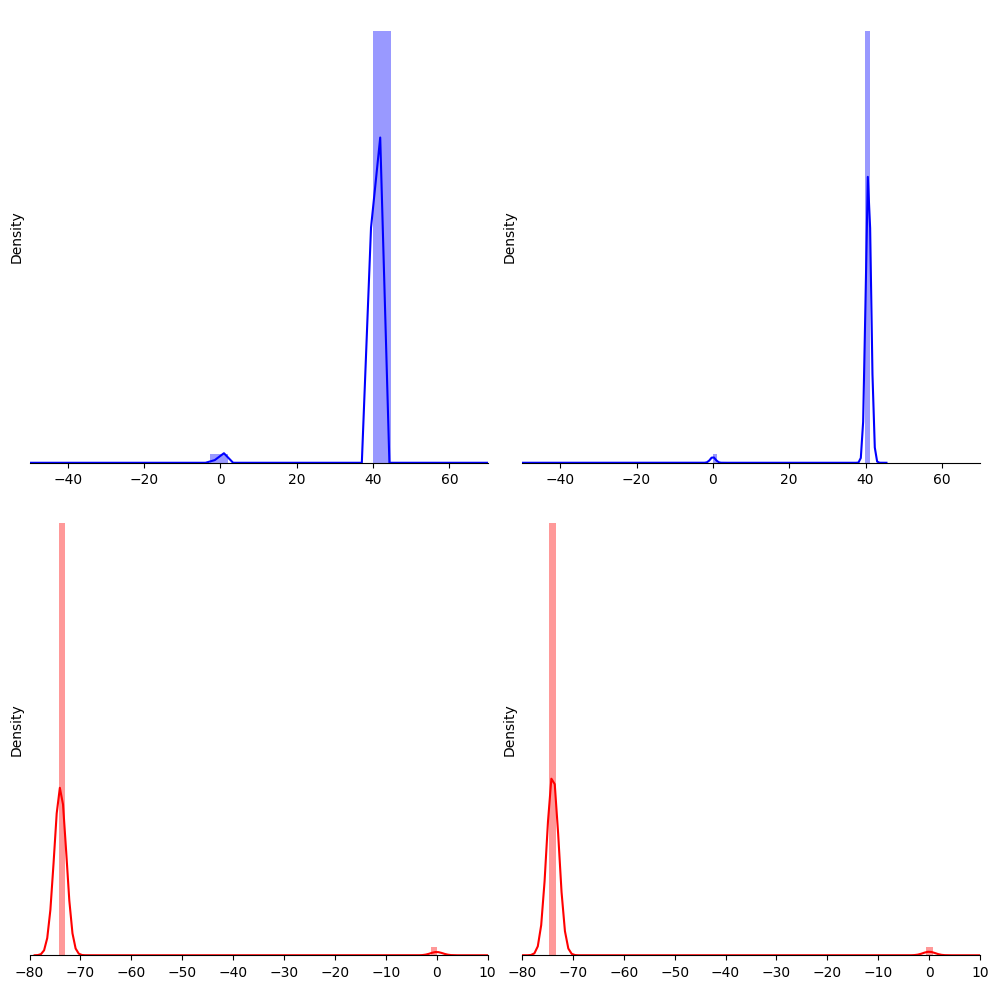

In [16]:
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sb.despine(left=True)
sb.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sb.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sb.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sb.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
axes[0, 0].set_xlim(-50,70)
axes[0, 1].set_xlim(-50,70)
axes[1, 0].set_xlim(-80,10)
axes[1, 1].set_xlim(-80,10)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

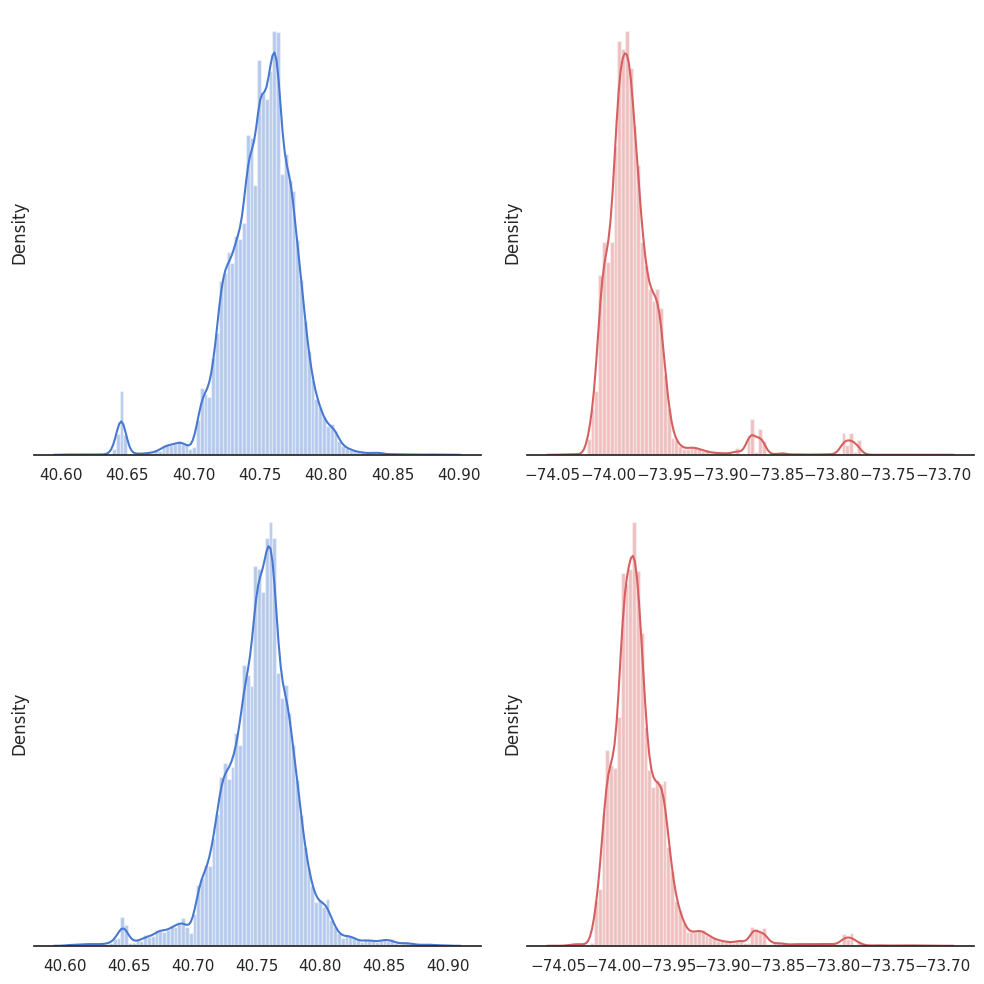

In [17]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_data_new = df.copy()
sb.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sb.despine(left=True)
sb.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sb.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sb.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sb.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

###Distance


In [56]:
!pip install geopy

In [57]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="city_locator")


In [58]:
def get_city_name(latitude, longitude):
    try:
        location = geolocator.reverse((latitude, longitude), exactly_one=True)
        address = location.raw.get("address", {})

        # Extract the city name from the address dictionary
        city = address.get("city", "")

        if not city:
            # If city name is not available, try other alternatives like town or village
            city = address.get("town", "")
            if not city:
                city = address.get("village", "")

        return city

    except Exception as e:
        print(f"Error: {e}")
        return None


In [59]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X =df.drop(['key', 'pickup_datetime','pickup_weekday', 'fare_amount'], axis = 1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             feature           VIF
0   pickup_longitude  4.159319e+06
1    pickup_latitude  2.630434e+06
2  dropoff_longitude  3.895089e+06
3   dropoff_latitude  2.021469e+06
4    passenger_count  2.663106e+00
5        pickup_hour  5.379755e+00
6        pickup_date  4.266828e+00
7       pickup_month  4.321991e+00
8         pickup_day  3.478447e+00


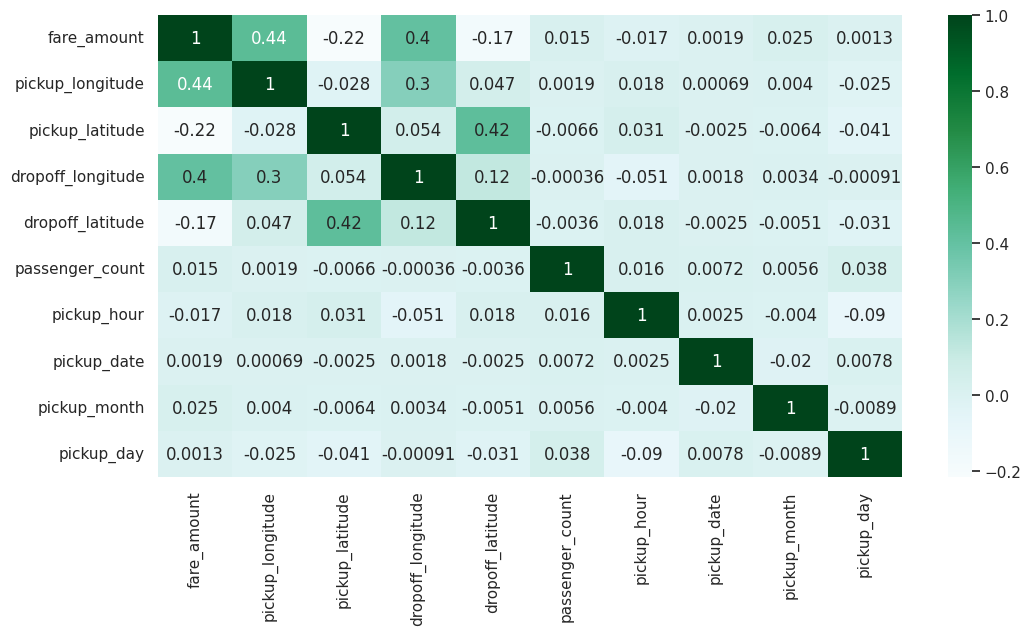

In [60]:
plt.figure(figsize = (12,6))
sb.heatmap(df.drop(['key', 'pickup_datetime','pickup_weekday'], axis = 1).corr(),
           cmap ='BuGn', annot = True);

In [61]:
df[['pickup_latitude', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude']].corr()



,pickup_latitude,pickup_longitude,dropoff_longitude,dropoff_latitude
pickup_latitude,1.000000,-0.027605,0.054257,0.424762
pickup_longitude,-0.027605,1.000000,0.300852,0.046557
dropoff_longitude,0.054257,0.300852,1.000000,0.117761
dropoff_latitude,0.424762,0.046557,0.117761,1.000000


In [18]:
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) * 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) * 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df['haversine_distance'] = haversine_distance(df['pickup_latitude'].values,
                                                     df['pickup_longitude'].values,
                                                     df['dropoff_latitude'].values,
                                                     df['dropoff_longitude'].values)
df_test['haversine_distance'] = haversine_distance(df_test['pickup_latitude'].values,
                                                     df_test['pickup_longitude'].values,
                                                     df_test['dropoff_latitude'].values,
                                                     df_test['dropoff_longitude'].values)

In [19]:
X = df.drop(['key', 'pickup_datetime','pickup_weekday', 'fare_amount'],
            axis = 1)
y = df['fare_amount']

In [20]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 3.86328449, -1.10815541,  4.00682446, -1.30276524, -0.51829393,
         0.5398016 , -0.07619801, -0.07904686, -1.54979277,         nan],
       [-1.19316328, -1.48290175, -0.15924119,  1.00945633, -0.51829393,
         0.38606293, -1.2308139 , -1.52280759, -1.03861501,  2.016862  ],
       [-0.21241786,  0.38660207, -0.52162093, -0.03320882,  0.257134  ,
        -2.07375572,  0.27018675,  0.49845743, -0.0162595 ,         nan],
       [-0.3417314 , -0.66576317, -0.53145669,  0.21649758, -0.51829393,
        -1.45880106,  0.61657152, -0.65655115,  1.00609601,  0.02640386],
       [ 0.21871558,  0.6387028 ,  0.525116  ,  1.06775432, -0.51829393,
        -0.99758506, -0.76896755, -0.9453033 , -1.03861501,  0.02258963]])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.ndim)
print(y_train.ndim)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
1
(34111, 10)
(34111,)
(14619, 10)
(14619,)


In [23]:
!pip install -q --upgrade linear-tree

###

In [25]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5).fit(X_train, y_train)
ridge.score(X_train, y_train)

ValueError: ignored